<a href="https://colab.research.google.com/github/Phyras/Satvam/blob/master/Data_Analysis_MuPlus_180F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from scipy.odr import *
from scipy.stats import chi2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Function Defintions

def _sum(arr):
  sum = 0
  for i in arr:
      sum = sum + np.abs(i)
 
  return(sum)

#This Function removes the Background Data aka the Muon decay lifetime histogram data recorded by 
#the respective TDC's with the Magnet off from the Muon Decay lifetime histogram data with the Magnets On
#density=True is used to normalize the histogram, this aids in performing algebra with histograms
#You won't necessarily have to use this function ever. 
def BGDataRemovedPlotter(Data, BGData, binsnumber):
  (counts1,bins1) = np.histogram(UpTdcMagOn2, bins=100, density=True)
  (counts2,bins2) = np.histogram(UpTdcTest2, bins=100, density=True)

  plt.hist(counts1-counts2,bins=100)
  return

#THIS IS TRUE FOR THE FOLLOWING FUNCTIONS NAMES DecayAsymmetry..., UplusD,...,UminusD...
#density=True is used to normalize the histogram, this aids in performing algebra with histograms
#Play around with binsnumber to get the optimal histogram to be able to see the oscillations
#In the parameters, Data refers to the Data recorded by the TDC with the magnets ON and BG refers to the magnet off but target in background 
#And TarOut refers to the background data collected with the Target swung out and magnet turned ON. 
#Functions names DecayAsymmetryFinder Give the U-D/U+D Ratio which should enable us to see oscillations. The functions UplusD and UminusD are self explanatory. 


#After removing All Backgrounds: 
def DecayAsymmetryFinder(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG, UpTdcTarOut, DownTdcTarOut, binsnumber):
  #The following are histograms with the Counts... being the frequency arrays (1D) and the Bins... being the bins array
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsUpTarOut, BinsUpTarOut = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownTarOut, BinsDownTarOut = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  
  #The BG Data removal is only from the frequency portion of the histograms
  UminusD = (CountsUpData-CountsUpBG-CountsUpTarOut)-(CountsDownData-CountsDownBG-CountsDownTarOut)
  UplusD = (CountsUpData-CountsUpBG-CountsUpTarOut)+(CountsDownData-CountsDownBG-CountsDownTarOut)
  RatioUD = (UminusD/UplusD)

  
  #This is to plot the Ratio: U+D/U-D data against the time delay bins:

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.


  plt.figure(figsize=(40,8)) #to make the graph look cleaner, to be able to see the 'waving'
  
  plt.scatter(xspace,RatioUD)

  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.sqrt(np.abs(RatioUD*(1-(RatioUD/sum(RatioUD)))))
  plt.errorbar(xspace, RatioUD,yerr=y_err,xerr=x_err, fmt ='o')
  plt.bar(xspace, RatioUD) #Just as a visual aid, not necessary
  plt.ylim(-5, 5)
  #plt.yscale('log') #To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts')
  plt.rc('axes', labelsize=24)
  return

#After removing Magnet Off and Target in background. 
def DecayAsymmetryFinderWithoutRemovingTargetOut(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG,binsnumber):
  #The following are histograms with the Counts... being the frequency arrays (1D) and the Bins... being the bins array
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  
  #The BG Data removal is only from the frequency portion of the histograms
  UminusD = (CountsUpData-CountsUpBG)-(CountsDownData-CountsDownBG)
  UplusD = (CountsUpData-CountsUpBG)+(CountsDownData-CountsDownBG)
  RatioUD = (UminusD/UplusD)
  
  #This is to plot the Ratio: U+D/U-D data against the time delay bins:

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.

  plt.figure(figsize=(40,8)) #to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,RatioUD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.sqrt(np.abs(RatioUD*(1-(RatioUD/sum(RatioUD)))))
  plt.errorbar(xspace, RatioUD,yerr=y_err,xerr=x_err, fmt ='o')
  plt.bar(xspace, RatioUD) #Just as a visual aid, not necessary
  plt.ylim(-5, 5)
  #plt.yscale('log') #To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts')
  plt.rc('axes', labelsize=24)

  return

#No background data removed. 
#This Function is used only to show the contrast between the inclusion and exlusion of BG Data. To be used in conjuection with the previous function. 
def DecayAsymmetryFinderWithoutRemovingBGDataAndTargetOut(UpTdcData,DownTdcData,binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0))
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0))

  UminusD = (CountsUpData)-(CountsDownData)
  UplusD = (CountsUpData)+(CountsDownData)
  RatioUD = (UminusD/UplusD)

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.

  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,RatioUD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.sqrt(np.abs(RatioUD*(1-(RatioUD/sum(RatioUD)))))
  plt.errorbar(xspace, RatioUD,yerr=y_err,xerr=x_err, fmt ='o')
  plt.bar(xspace, RatioUD)#Just as a visual aid, not necessary
  plt.ylim(-5, 5)
  #plt.yscale('log')#To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts')
  plt.rc('axes', labelsize=24)
  return

#No background data removed. 
def UminusDFinderWithoutRemovingBGAndTargetOut(UpTdcData, DownTdcData,binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0))
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0))

  UminusD = (CountsUpData)-(CountsDownData)
  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UminusD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.log(np.sqrt(np.abs(UminusD*(1-(UminusD/sum(UminusD))))))
  plt.errorbar(xspace, UminusD,yerr=y_err,xerr=x_err, fmt ='o')
  plt.bar(xspace, UminusD)#Just as a visual aid, not necessary
  plt.yscale('log')#To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return UminusD, xspace

#No background data removed. 
def UplusDFinderWithoutRemovingBGAndTargetOut(UpTdcData, DownTdcData,binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0))
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0))

  UplusD = (CountsUpData)+(CountsDownData)
  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UplusD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.log(np.sqrt(np.abs(UplusD*(1-(UplusD/sum(UplusD))))))
  plt.errorbar(xspace, UplusD,yerr=y_err,xerr=x_err, fmt ='o')
  plt.bar(xspace, UplusD)#Just as a visual aid, not necessary
  plt.yscale('log')#To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return

#After removing Magnet Off and Target in background. 
def UminusDFinderWithoutRemovingTargetOut(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG,binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)

  #The BG Data removal is only from the frequency portion of the histograms
  UminusD = (CountsUpData-CountsUpBG)-(CountsDownData-CountsDownBG)
  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UminusD)
  y_err = np.log(np.sqrt(np.abs(UminusD*(1-(UminusD/_sum(UminusD))))))
  x_err = np.repeat(np.array([5]),len(xspace))
  plt.errorbar(xspace, UminusD,yerr=None,xerr=x_err, fmt ='o')
  plt.bar(xspace, UminusD)#Just as a visual aid, not necessary
  plt.yscale('log')
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return UminusD, xspace

#After removing Magnet Off and Target in background. 
def UplusDFinderWithoutRemovingTargetOut(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG,binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  
  #The BG Data removal is only from the frequency portion of the histograms
  UplusD = (CountsUpData-CountsUpBG)+(CountsDownData-CountsDownBG)

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UplusD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.log(np.sqrt(np.abs(UplusD*(1-(UplusD/_sum(UplusD))))))
  plt.errorbar(xspace, UplusD,yerr=None,xerr=x_err, fmt ='o')
  plt.bar(xspace, UplusD)#Just as a visual aid, not necessary
  plt.yscale('log')#To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return 

#After removing All Backgrounds: 
def UminusDFinder(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG, UpTdcTarOut, DownTdcTarOut, binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsUpTarOut, BinsUpTarOut = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownTarOut, BinsDownTarOut = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  
  #The BG Data removal is only from the frequency portion of the histograms
  UminusD = (CountsUpData-CountsUpBG-CountsUpTarOut)-(CountsDownData-CountsDownBG-CountsDownTarOut)

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UminusD)
  y_err = np.log(np.sqrt(np.abs(UminusD*(1-(UminusD/_sum(UminusD))))))
  x_err = np.repeat(np.array([5]),len(xspace))
  plt.errorbar(xspace, UminusD,yerr=None,xerr=x_err, fmt ='o')
  plt.bar(xspace, UminusD)#Just as a visual aid, not necessary
  plt.yscale('log')
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return UminusD, xspace

#After removing All Backgrounds: 
def UplusDFinder(UpTdcData,DownTdcData,UpTdcBG,DownTdcBG, UpTdcTarOut, DownTdcTarOut, binsnumber):
  CountsUpData, BinsUpData = np.histogram(UpTdcData, bins = binsnumber, range=(0.0,999.0), density=True) 
  CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsUpTarOut, BinsUpTarOut = np.histogram(UpTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownData, BinsDownData = np.histogram(DownTdcData, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
  CountsDownTarOut, BinsDownTarOut = np.histogram(DownTdcBG, bins = binsnumber, range=(0.0,999.0), density=True)
 
  
  #The BG Data removal is only from the frequency portion of the histograms
  UplusD = (CountsUpData-CountsUpBG-CountsUpTarOut)+(CountsDownData-CountsDownBG-CountsDownTarOut)

  xspace = BinsUpData[1:] #Some weird shape considerations with regard to how binning in histograms work
  xspace = np.transpose(xspace) #Some weird business involving (1,n) and (n,1) arrays and how they get fed into plt.scatter.
  plt.figure(figsize=(40,8))#to make the graph look cleaner, to be able to see the 'waving'
  plt.scatter(xspace,UplusD)
  x_err = np.repeat(np.array([5]),len(xspace))
  y_err = np.log(np.sqrt(np.abs(UplusD*(1-(UplusD/_sum(UplusD))))))
  plt.errorbar(xspace, UplusD,yerr=None,xerr=x_err, fmt ='o')
  plt.bar(xspace, UplusD)#Just as a visual aid, not necessary
  plt.yscale('log')#To help discern patterns, again.
  plt.xlabel('time (x 20 ns)')
  plt.ylabel('Normalized Counts in Log Scale')
  plt.rc('axes', labelsize=24)

  return


#Fitting function: 

#makes a histogram from 1D array data
def histdata(data):
  data_binned, data_bins = np.histogram(data, bins = 100, range=(0.0,999.0))
  return data_binned, data_bins

#makes a normalized histogram from 1D array data
def histdatanorm(data):
  data_binned, data_bins = np.histogram(data, bins = 100, range=(0.0,999.0),density=True)
  return data_binned, data_bins

def exponential_only_fun(params,time):
  A,B,C = params
  y = A*np.exp(-B*time)
  return y 

def exponential_fit_fun(time,A,B,C):
  y = A*np.exp(-B*time) + C
  return y 

def exponential_fit_fun2(params,time):
  A,B,C = params
  y = A*np.exp(-B*time) + C
  return y 

def sinusoidal_fit_fun(params, time):
  A, B, omega, Gamma, phi = params
  y = (np.exp(-abs(Gamma)*time))*(A+B*(np.cos(omega*time + phi)))
  return y

def get_exponential_residuals(parameters,data,time):
  data_binned, data_bins = np.histogram(data, bins = 100, range=(0.0,999.0),density=True)
  theoretical_function = exponential_fit_fun(parameters,time)
  residuals = np.abs(theoretical_function-data_binned)
  return residuals

#ODR Fits for decaying exponential distributions - Muon Lifetime Distributions. 
def odr_and_chi_square_fit_exponential(GuessA, GuessB, GuessC, start, end, data, exponential_only_fun, exponential_fit_fun2):
  
  GuessParameters = [GuessA, GuessB, GuessC]

  #start = 4 #min 0 
  #end = 75 #max 100

  TimeMuons = np.linspace(0.0,999.0,100)
  datahist,binhist = histdata(data)
  expmodel = Model(exponential_fit_fun2)
  mean_data = np.mean(datahist)
  delta_mean = mean_data-0
  err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
  err_y = np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons))

  while abs(delta_mean) > 5*10**(-7):
    dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
    odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
    out = odr.run()
    mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
    delta_mean = mean_data_new - mean_data
    mean_data = mean_data_new
    err_y = np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))
    #out.pprint()

  BestParameters = out.beta
  errors = np.diag(out.cov_beta)**(1/2) #which error to use?
  #errors = out.sd_beta
  lifetime = 0.02/BestParameters[1]
  lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
  print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

  chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
  n = (end-start)-len(GuessParameters)
  pval = 1-chi2.cdf(chi_sqr,n)
  print('\u03C7\u00b2 = ' +str(chi_sqr))
  print('Degrees of Freedom = ' +str(n))
  print('P-Value = ' + str(pval))

  #to prevent y error bar from going to less than 0
  err_y_upper = err_y.copy()
  err_y_lower = err_y.copy()
  err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
  err_y = np.stack([err_y_lower,err_y_upper])

  plt.figure(figsize=[10,10])
  plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x')
  plt.yscale('log')
  plt.xlabel('time ($\mu$s)')
  plt.ylabel('Counts in Log Scale')
  plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
  data = data*0.02
  plt.hist(data,bins = 100, range = (0.0,14.0))
  return 

#ODR Fits for sinusoidal distributions - for U-D Distributions.
def odr_and_chi_square_fit_sinusoidal(GuessA, GuessB, GuessOmega, GuessGamma, GuessPhi, start, end, data, xspace, sinusoidal_fit_fun):

  GuessParameters = [GuessA, GuessB, GuessOmega, GuessGamma, GuessPhi]
  # xspace = np.delete(xspace,np.where(data==0))
  # data = np.delete(data,np.where(data==0))
  TimeMuons = xspace
  expmodel = Model(sinusoidal_fit_fun)
  # mean_data = np.mean(data)
  # delta_mean = mean_data-0
  err_x = np.zeros(np.shape(data))+xspace[0] #binwidth/2
  err_y = np.sqrt(abs(data))
  err_y[err_y==0] = np.sqrt(0.68)
  if end == 0:
    end = len(data)

  dataobj = RealData(TimeMuons[start:end],data[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=2000,sstol=10**(-7))
  out = odr.run()

  # while abs(delta_mean) > 5*10**(-7):
  #   dataobj = RealData(TimeMuons,data,sx=err_x,sy=err_y)
  #   odr = ODR(dataobj,expmodel,beta0=GuessParameters)#,maxit=1000,sstol=10**(-5))
  #   out = odr.run()
  #   mean_data_new = np.mean(sinusoidal_fit_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  #   delta_mean = mean_data_new - mean_data
  #   mean_data = mean_data_new
  #   err_y = mean_data/(np.sqrt(abs(data))) 
  #   #out.pprint()

  BestParameters = out.beta
  errors = np.diag(out.cov_beta)**(1/2) #which error to use?
  # #errors = out.sd_beta
  # lifetime = 0.02/BestParameters[1]
  # lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
  # print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

  # chi_sqr = np.sum((data[start:end]-sinusoidal_fit_fun(BestParameters,TimeMuons[start:end]))**2/sinusoidal_fit_fun(BestParameters,TimeMuons[start:end]))
  # n = (end-start)-len(GuessParameters)
  # pval = 1-chi2.cdf(chi_sqr,n)
  # print('\u03C7\u00b2 = ' +str(chi_sqr))
  # print('Degrees of Freedom = ' +str(n))
  # print('P-Value = ' + str(pval))
  print(out.beta)
  print(errors)

  plt.figure(figsize=[10,10])
  plt.errorbar(TimeMuons[start:end]*0.02,data[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[start:end], linestyle='None', marker='x')
  plt.plot(TimeMuons[start:end]*0.02,data[start:end])
  #plt.yscale('log')
  plt.xlabel('time ($\mu$s)')
  plt.ylabel('Counts')
  plt.plot(TimeMuons[start:end]*0.02,sinusoidal_fit_fun(BestParameters,TimeMuons[start:end]))
  return




[ 230. -999.  173. ...    6.  101.  150.]
[-999.   57. -999. ... -999. -999. -999.]


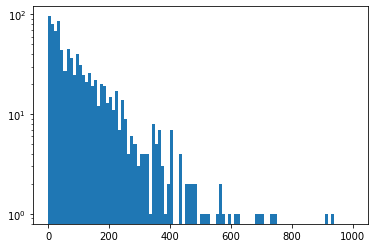

In [ ]:
#@title Test 1: Preliminary (Mag off run 1) Up TDC
test1 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/test_1_10122022.txt")
UpTdcTest1 = np.array(test1[:,2])
DownTdcTest1 = np.array(test1[:,3])
print(UpTdcTest1)
print(DownTdcTest1)
plt.hist(UpTdcTest1,bins = 100, range = (0.0,999.0))
plt.yscale('log')


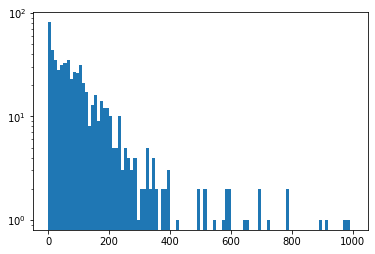

In [ ]:
#@title Test 1: Preliminary (Mag off run 1) Down TDC
plt.hist(DownTdcTest1, bins = 100, range = (0.0,999.0))
plt.yscale('log')


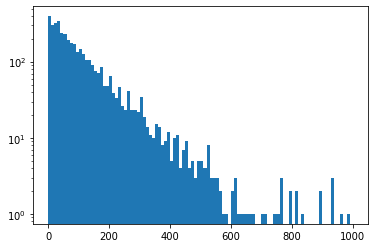

In [ ]:
#@title Test 1: Preliminary (Mag off run 2) Up TDC
test2 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magoff_1_10132022.txt")
UpTdcTest2 = np.array(test2[:,2])
DownTdcTest2 = np.array(test2[:,3])
#print(UpTdcTest2)
#print(DownTdcTest2)
plt.hist(UpTdcTest2,bins = 100, range = (0.0,999.0))
plt.yscale('log')

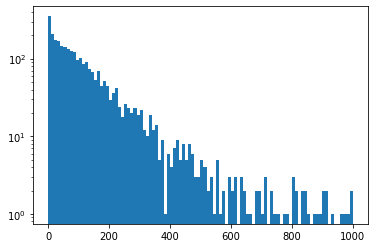

In [ ]:
#@title Test 1: Preliminary (Mag off run 2) Down TDC
plt.hist(DownTdcTest2,bins = 100, range = (0.0,999.0))
plt.yscale('log')

Text(0, 0.5, 'Counts in Log Scale')

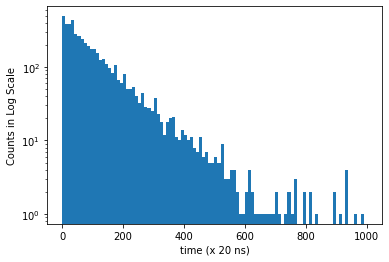

In [ ]:
#@title Total BG Data Up TDC
UpTdcBG = np.append(UpTdcTest1,UpTdcTest2)
DownTdcBG = np.append(DownTdcTest1,DownTdcTest2)

plt.hist(UpTdcBG,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')

Text(0, 0.5, 'Counts in Log Scale')

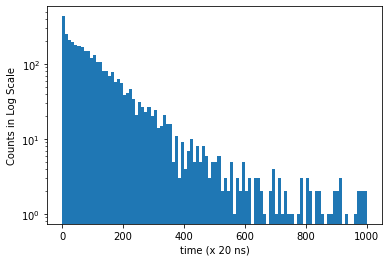

In [ ]:
#@title Total BG Data Down TDC
plt.hist(DownTdcBG,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')

In [ ]:
#@title Up to Down Ration BG Data
UpRatio = []
DownRatio = []
count = 0

for i in range(len(UpTdcBG)):
  if UpTdcBG[i]!=-999: 
#  if UpTdcTest2[i] != -999:
    Upentry = UpTdcBG[i]
    UpRatio.append(Upentry)
    

  else:
    count+1

for i in range(len(DownTdcBG)):
  if DownTdcBG[i] != -999:
    Downentry = DownTdcBG[i]
    DownRatio.append(Downentry)

  else:
      count+1

Ratio = len(UpRatio)/len(DownRatio)

print(Ratio)


1.425611510791367


[-999. -999. -999. ... -999.    5.    7.]
[ 327.   60.   89. ...   44. -999. -999.]


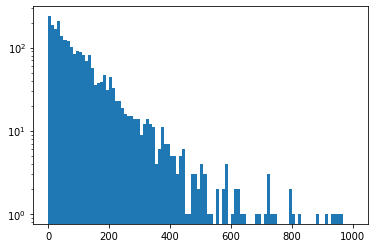

In [ ]:
#@title Mag on: run 1 Up TDC
magon1 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_1_10182022.txt")
UpTdcMagOn1 = np.array(magon1[:,2])
DownTdcMagOn1 = np.array(magon1[:,3])
print(UpTdcMagOn1)
print(DownTdcMagOn1)
plt.hist(UpTdcMagOn1,bins = 100, range = (0.0,999.0))
plt.yscale('log')

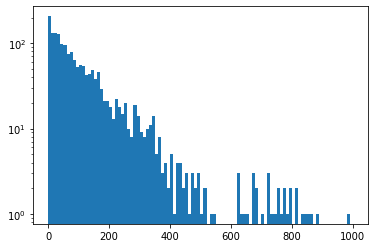

In [ ]:
#@title Mag on: run 1 Down TDC
plt.hist(DownTdcMagOn1,bins = 100, range = (0.0,999.0)) 
plt.yscale('log')

In [ ]:
#@title Up to Down Ratio Mag On Run 1
UpRatio2 = []
DownRatio2 = []
count = 0

for i in range(len(UpTdcMagOn1)):
  if UpTdcMagOn1[i]!=-999: 
#  if UpTdcTest2[i] != -999:
    Upentry2 = UpTdcMagOn1[i]
    UpRatio2.append(Upentry2)
    

  else:
    count+1

for i in range(len(DownTdcMagOn1)):
  if DownTdcMagOn1[i] != -999:
    Downentry2 = DownTdcMagOn1[i]
    DownRatio2.append(Downentry2)

  else:
      count+1

Ratio2 = len(UpRatio2)/len(DownRatio2)

print(Ratio2)

1.3752847380410023


Mag On Run 2


[-999.   65. -999. ...  171.  115. -999.]
[ 176. -999.   47. ... -999. -999.  316.]


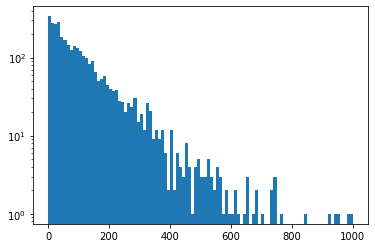

In [ ]:
#@title Mag on: run 2 Up TDC
magon2 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_2_10212022.txt")
UpTdcMagOn2 = np.array(magon2[:,2])
DownTdcMagOn2 = np.array(magon2[:,3])
print(UpTdcMagOn2)
print(DownTdcMagOn2)
plt.hist(UpTdcMagOn2,bins = 100, range = (0.0,999.0))
plt.yscale('log')

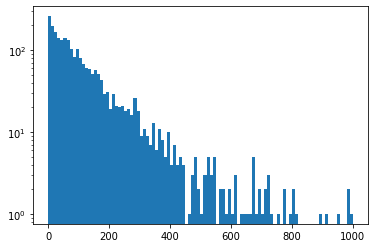

In [ ]:
#@title Mag on: run 1 Down TDC
plt.hist(DownTdcMagOn2,bins = 100, range = (0.0,999.0)) 
plt.yscale('log')

In [ ]:
#@title Up to Down Ratio Mag On Run 2
UpRatio3 = []
DownRatio3 = []
count = 0

for i in range(len(UpTdcMagOn2)):
  if UpTdcMagOn2[i]!=-999: 
#  if UpTdcTest2[i] != -999:
    Upentry3 = UpTdcMagOn2[i]
    UpRatio3.append(Upentry3)
    

  else:
    count+1

for i in range(len(DownTdcMagOn2)):
  if DownTdcMagOn2[i] != -999:
    Downentry3 = DownTdcMagOn2[i]
    DownRatio3.append(Downentry3)

  else:
      count+1

Ratio3 = len(UpRatio3)/len(DownRatio3)

print(Ratio3)

1.4027661357921206


Mag On Run 3

[-999. -999.   17. ...   40.    9. -999.]
[  69.   16. -999. ... -999. -999.   38.]


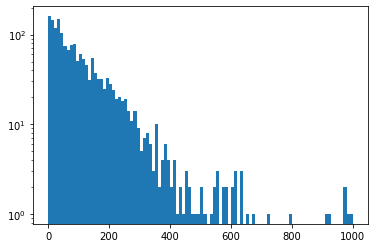

In [ ]:
#@title Mag on: run 3 Up TDC
magon3 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_3_10252022.txt")
UpTdcMagOn3 = np.array(magon3[:,2])
DownTdcMagOn3 = np.array(magon3[:,3])
print(UpTdcMagOn3)
print(DownTdcMagOn3)
plt.hist(UpTdcMagOn3,bins = 100, range = (0.0,999.0))
plt.yscale('log')

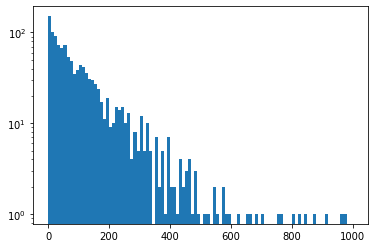

In [ ]:
#@title Mag on: run 3 Down TDC
plt.hist(DownTdcMagOn3,bins = 100, range = (0.0,999.0)) 
plt.yscale('log')

In [ ]:
#@title Loading Runs 4-9 Mag On Data
magon4 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_4_10272022.txt")
UpTdcMagOn4 = np.array(magon4[:,2])
DownTdcMagOn4 = np.array(magon4[:,3])

magon5 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_5_11012022.txt")
UpTdcMagOn5 = np.array(magon5[:,2])
DownTdcMagOn5 = np.array(magon5[:,3])

magon6 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_6_11032022.txt")
UpTdcMagOn6 = np.array(magon6[:,2])
DownTdcMagOn6 = np.array(magon6[:,3])

magon7 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_7_11042022.txt")
UpTdcMagOn7 = np.array(magon7[:,2])
DownTdcMagOn7 = np.array(magon7[:,3])

magon8 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_8_11082022.txt")
UpTdcMagOn8 = np.array(magon8[:,2])
DownTdcMagOn8 = np.array(magon8[:,3])

magon9 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magon_9_11102022.txt")
UpTdcMagOn9 = np.array(magon9[:,2])
DownTdcMagOn9 = np.array(magon9[:,3])

Total Mag On Data

Text(0, 0.5, 'Counts in Log Scale')

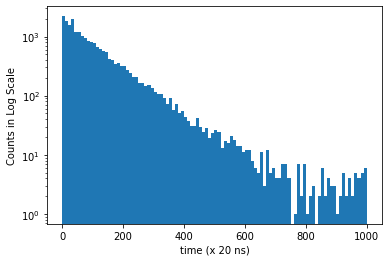

In [ ]:
#@title Total Mag On Data Up TDC
UpTdcMagOn12 = np.append(UpTdcMagOn1,UpTdcMagOn2)
UpTdcMagOn34 = np.append(UpTdcMagOn3,UpTdcMagOn4)
UpTdcMagOn56 = np.append(UpTdcMagOn5,UpTdcMagOn6)
UpTdcMagOn78 = np.append(UpTdcMagOn7,UpTdcMagOn8)
UpTdcMagOn1to4 = np.append(UpTdcMagOn12,UpTdcMagOn34)
UpTdcMagOn5to8 = np.append(UpTdcMagOn56,UpTdcMagOn78)
UpTdcMagOn1to8 = np.append(UpTdcMagOn1to4,UpTdcMagOn5to8)
UpTdcMagOn = np.append(UpTdcMagOn1to8,UpTdcMagOn9)

DownTdcMagOn12 = np.append(DownTdcMagOn1,DownTdcMagOn2)
DownTdcMagOn34 = np.append(DownTdcMagOn3,DownTdcMagOn4)
DownTdcMagOn56 = np.append(DownTdcMagOn5,DownTdcMagOn6)
DownTdcMagOn78 = np.append(DownTdcMagOn7,DownTdcMagOn8)
DownTdcMagOn1to4 = np.append(DownTdcMagOn12,DownTdcMagOn34)
DownTdcMagOn5to8 = np.append(DownTdcMagOn56,DownTdcMagOn78)
DownTdcMagOn1to8 = np.append(DownTdcMagOn1to4,DownTdcMagOn5to8)
DownTdcMagOn = np.append(DownTdcMagOn1to8,DownTdcMagOn9)

plt.hist(UpTdcMagOn,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')

Text(0, 0.5, 'Counts in Log Scale')

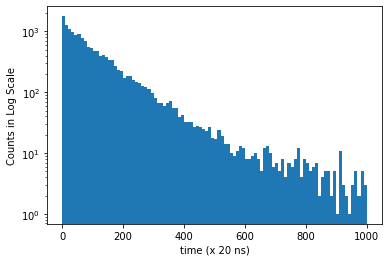

In [ ]:
#@title Total Mag On Data Down TDC
plt.hist(DownTdcMagOn,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')

Text(0, 0.5, 'Counts in Log Scale')

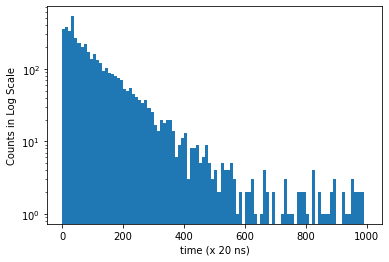

In [ ]:
#@title Total Target out Data (UpTDC)
TarOut1 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magtarout_1_11152022.txt")
UpTdcTarOut1 = np.array(TarOut1[:,2])
DownTdcTarOut1 = np.array(TarOut1[:,3])

TarOut2 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magtarout_2_11172022.txt")
UpTdcTarOut2 = np.array(TarOut2[:,2])
DownTdcTarOut2 = np.array(TarOut2[:,3])

TarOut3 = np.loadtxt("/content/drive/MyDrive/180 F - muplus/Data/magtarout_3_11222022.txt")
UpTdcTarOut3 = np.array(TarOut3[:,2])
DownTdcTarOut3 = np.array(TarOut3[:,3])

UpTdcTarOut12 = np.append(UpTdcTarOut1,UpTdcTarOut2)
UpTdcTarOut = np.append(UpTdcTarOut12,UpTdcTarOut3)

DownTdcTarOut12 = np.append(DownTdcTarOut1,DownTdcTarOut2)
DownTdcTarOut = np.append(DownTdcTarOut12,DownTdcTarOut3)

plt.hist(UpTdcTarOut,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')



Text(0, 0.5, 'Counts in Log Scale')

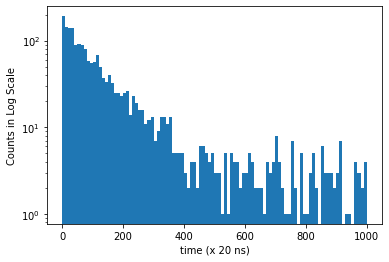

In [ ]:
#@title Total Target out Data (DownTDC)
plt.hist(DownTdcTarOut,bins = 100, range = (0.0,999.0))
plt.yscale('log')
plt.xlabel('time (x 20 ns)')
plt.ylabel('Counts in Log Scale')

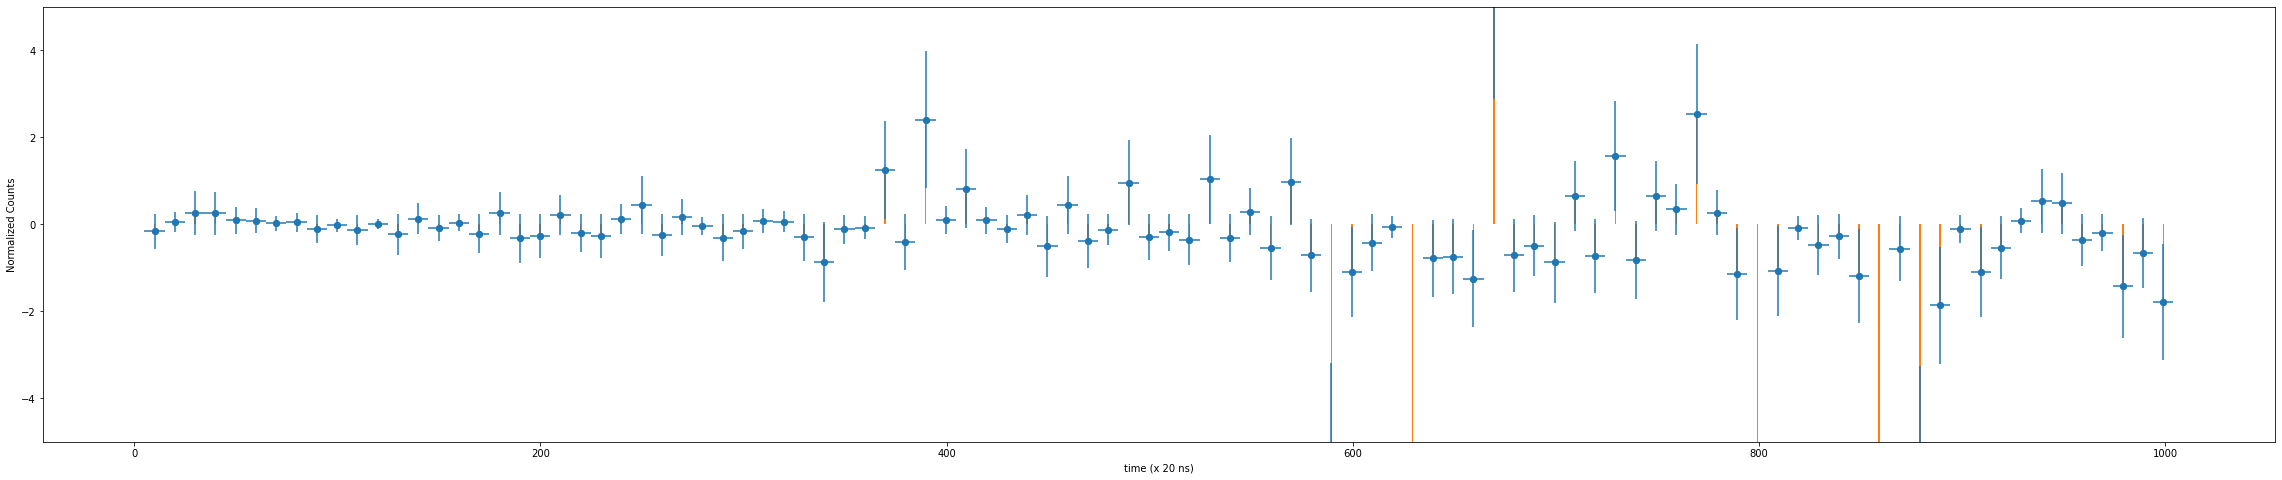

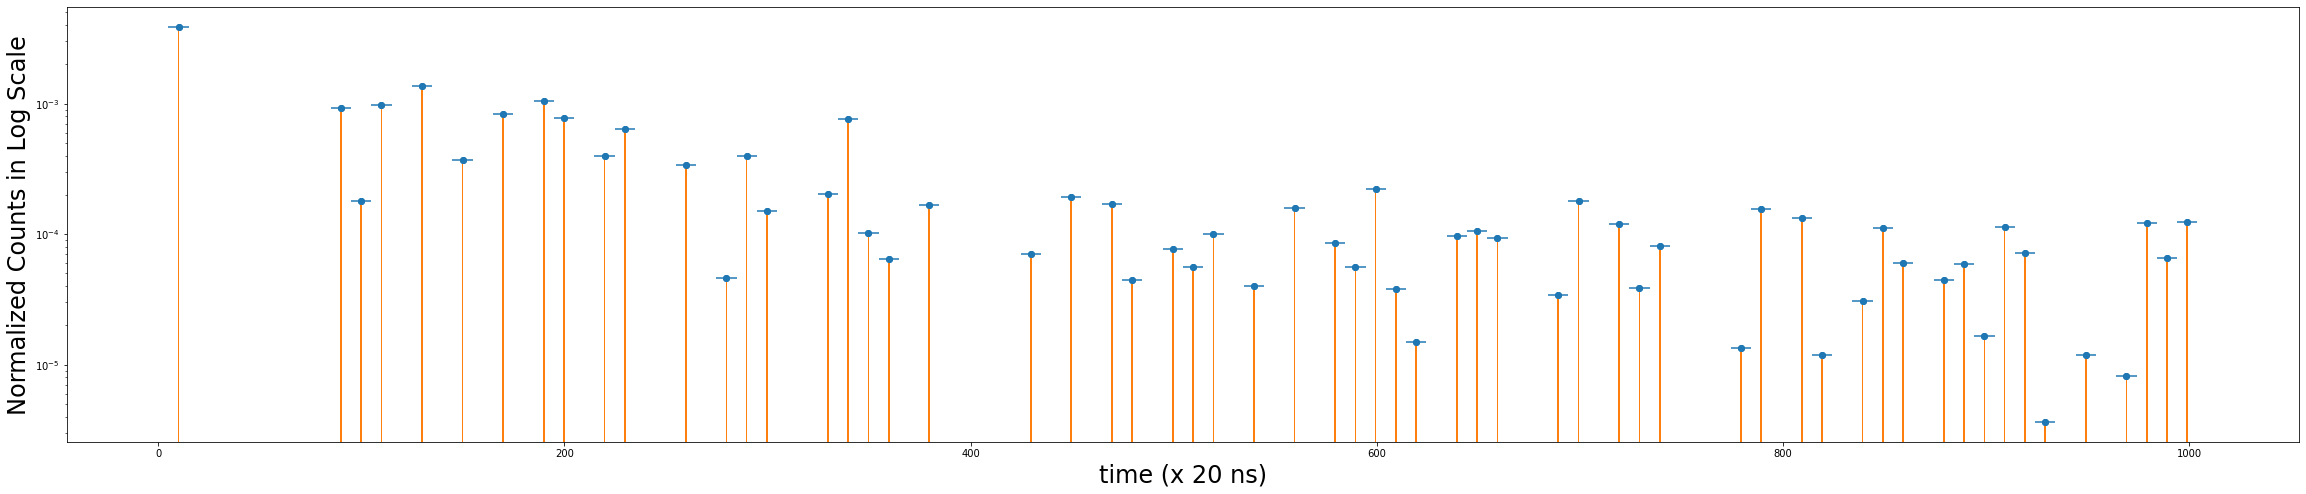

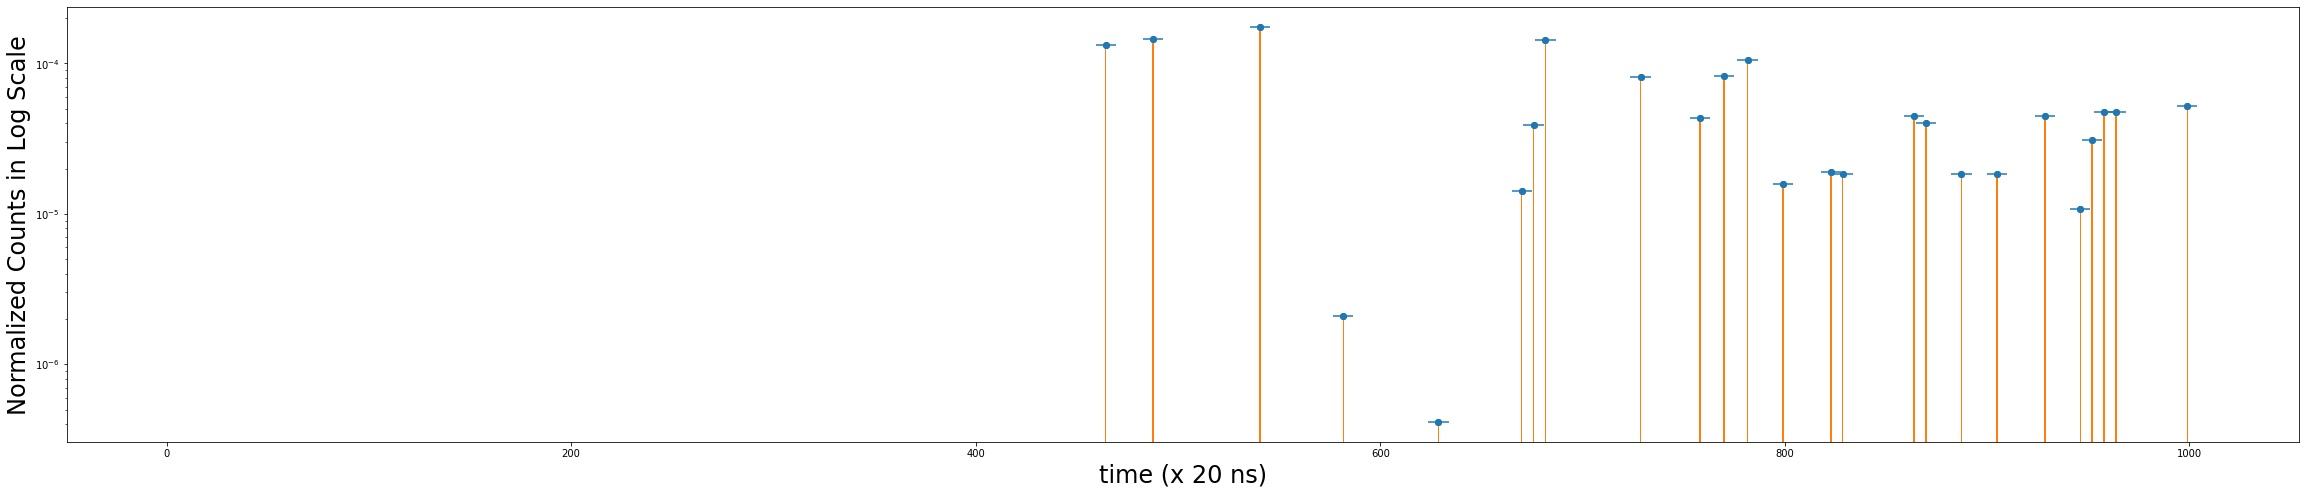

In [ ]:
#@title U-D/U+D, U-D, U+D with BG Data Removed and Target Out Removed
DecayAsymmetryFinder(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,UpTdcTarOut,DownTdcTarOut,100)
UminusD, UminusDxspace = UminusDFinder(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,UpTdcTarOut,DownTdcTarOut,100)
UplusDFinder(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,UpTdcTarOut,DownTdcTarOut,170)


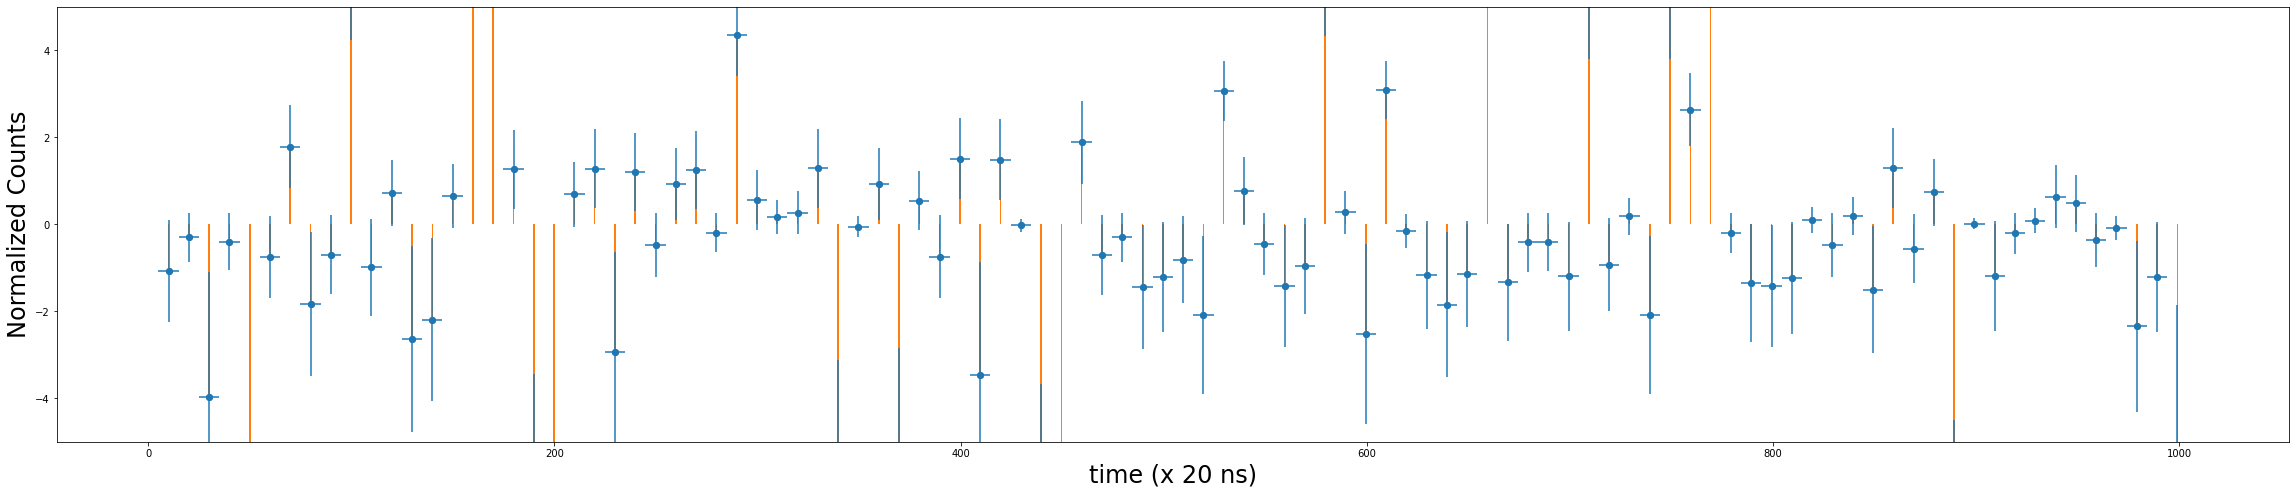

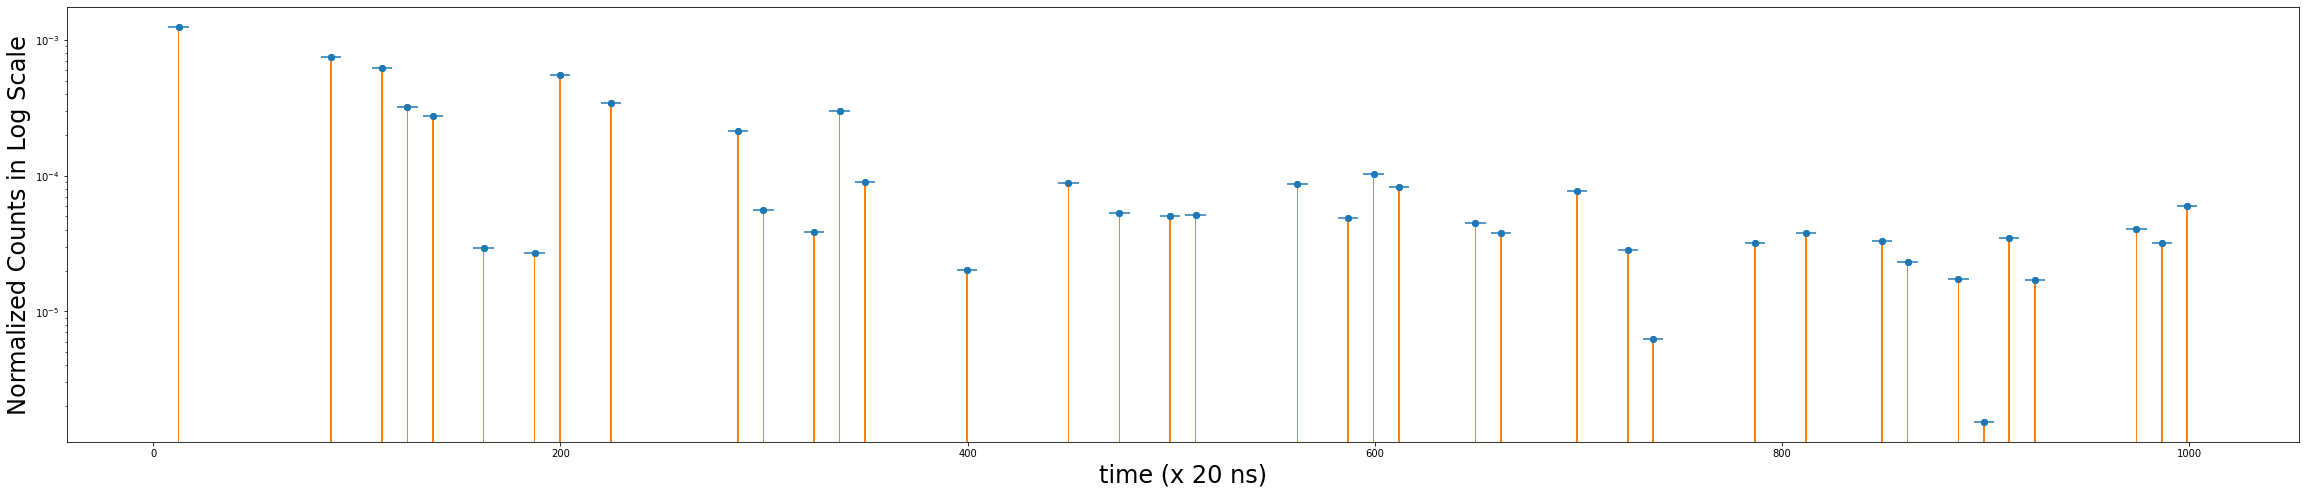

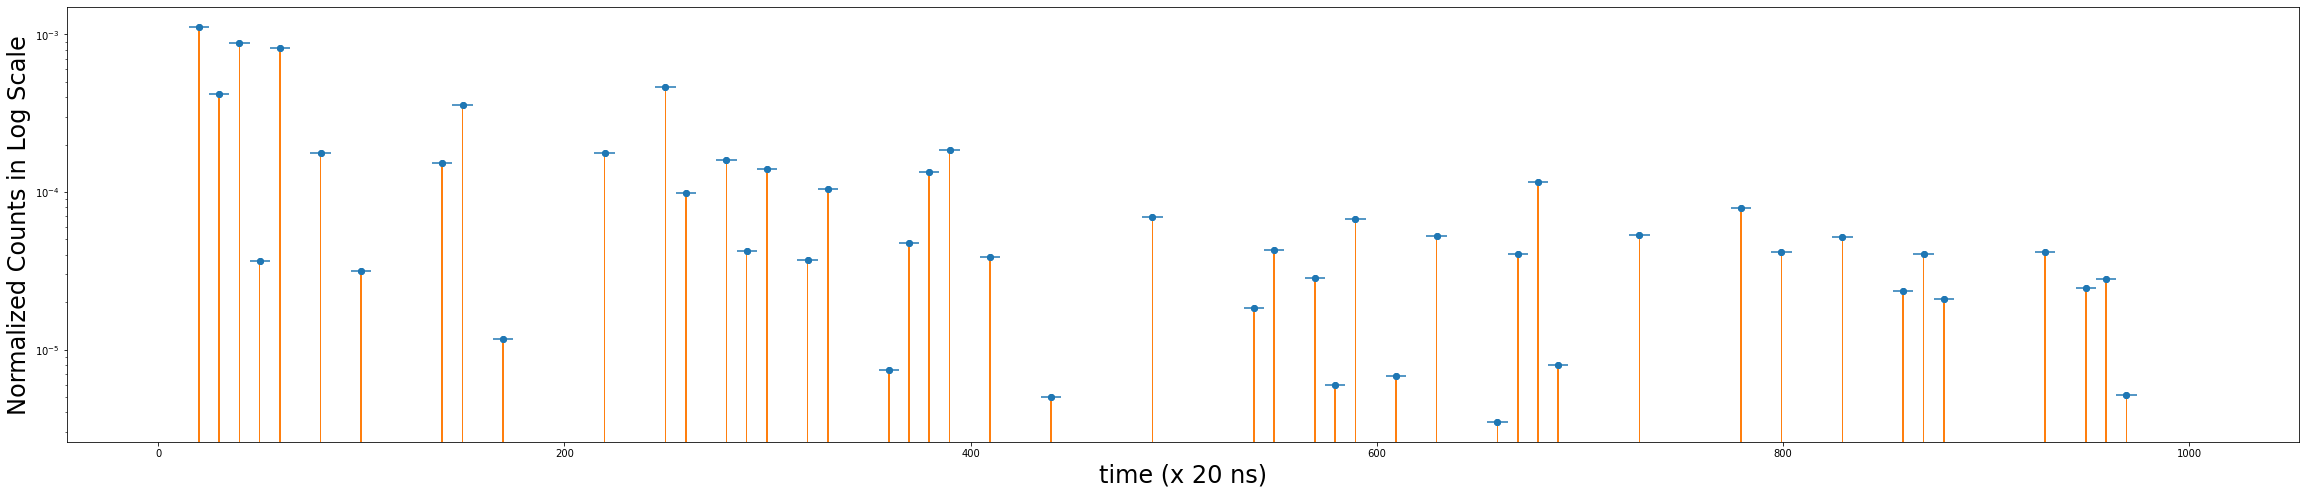

In [ ]:
#@title U-D/U+D, U-D, U+D with BG Data Removed and Target in 
DecayAsymmetryFinderWithoutRemovingTargetOut(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,100)
UminusDWithoutRemovingTargetOut, UminusDWithoutRemovingTargetOutxspace = UminusDFinderWithoutRemovingTargetOut(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,80)
UplusDFinderWithoutRemovingTargetOut(UpTdcMagOn,DownTdcMagOn,UpTdcBG,DownTdcBG,100)

<ipython-input-3-5e8b71a26b32>:135: RuntimeWarning: divide by zero encountered in log
  y_err = np.log(np.sqrt(np.abs(UminusD*(1-(UminusD/sum(UminusD))))))


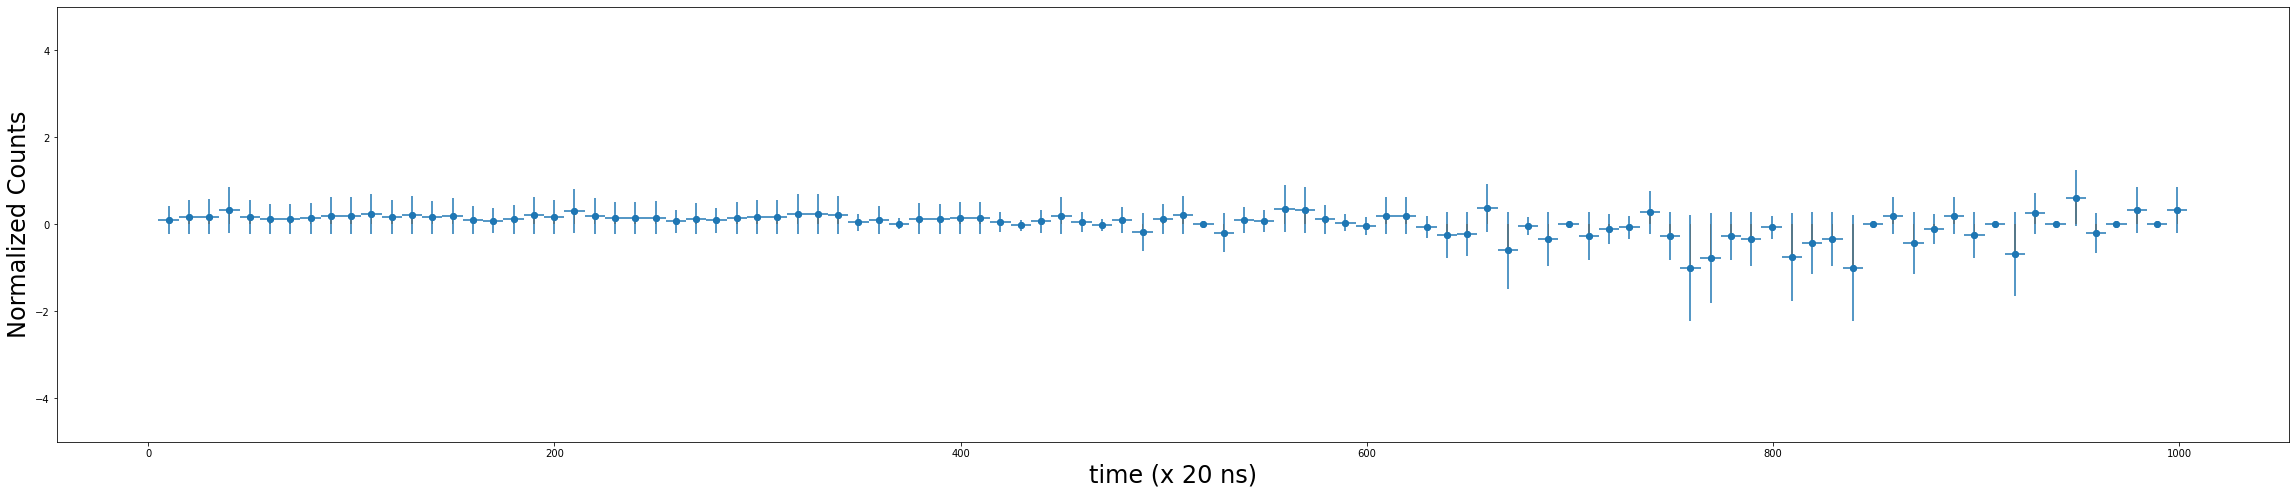

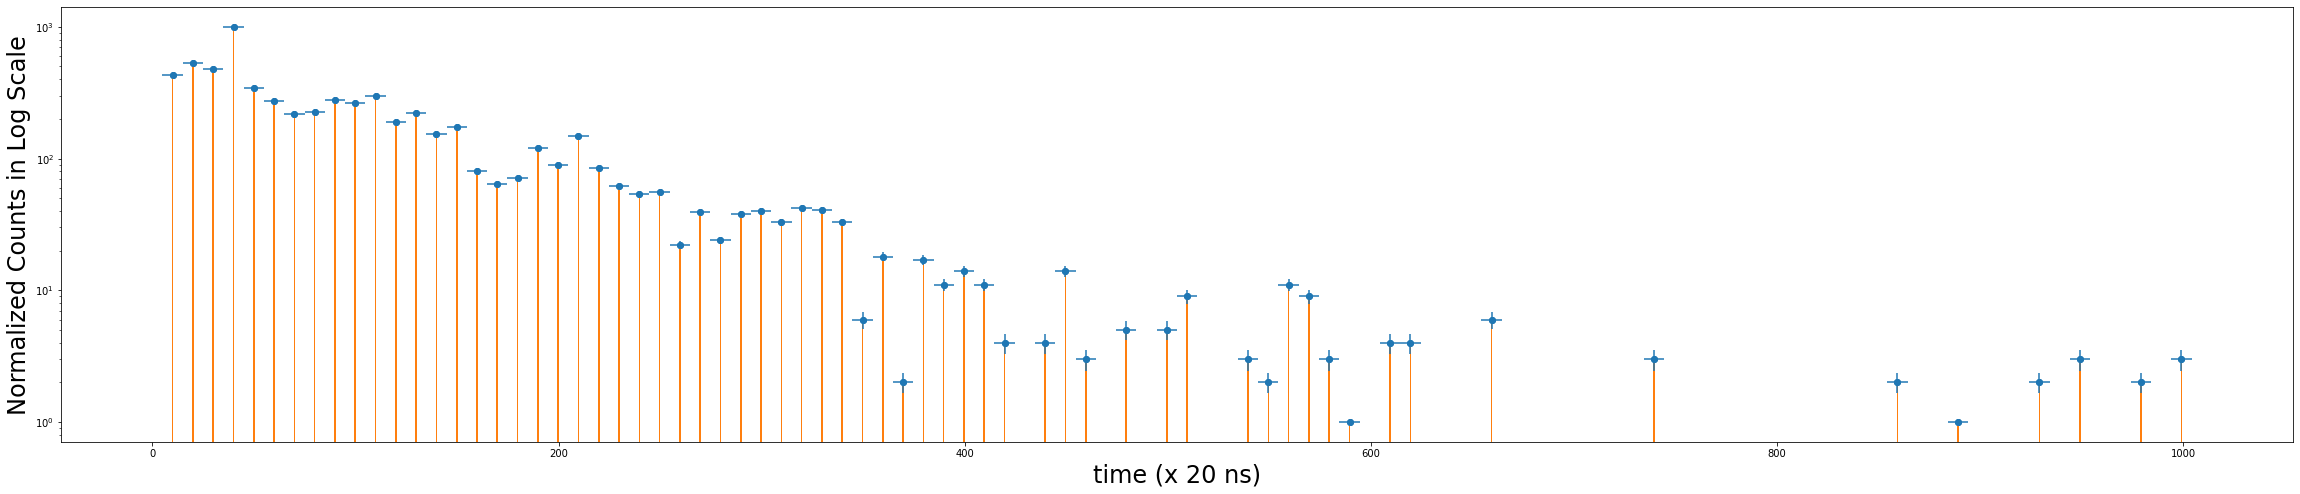

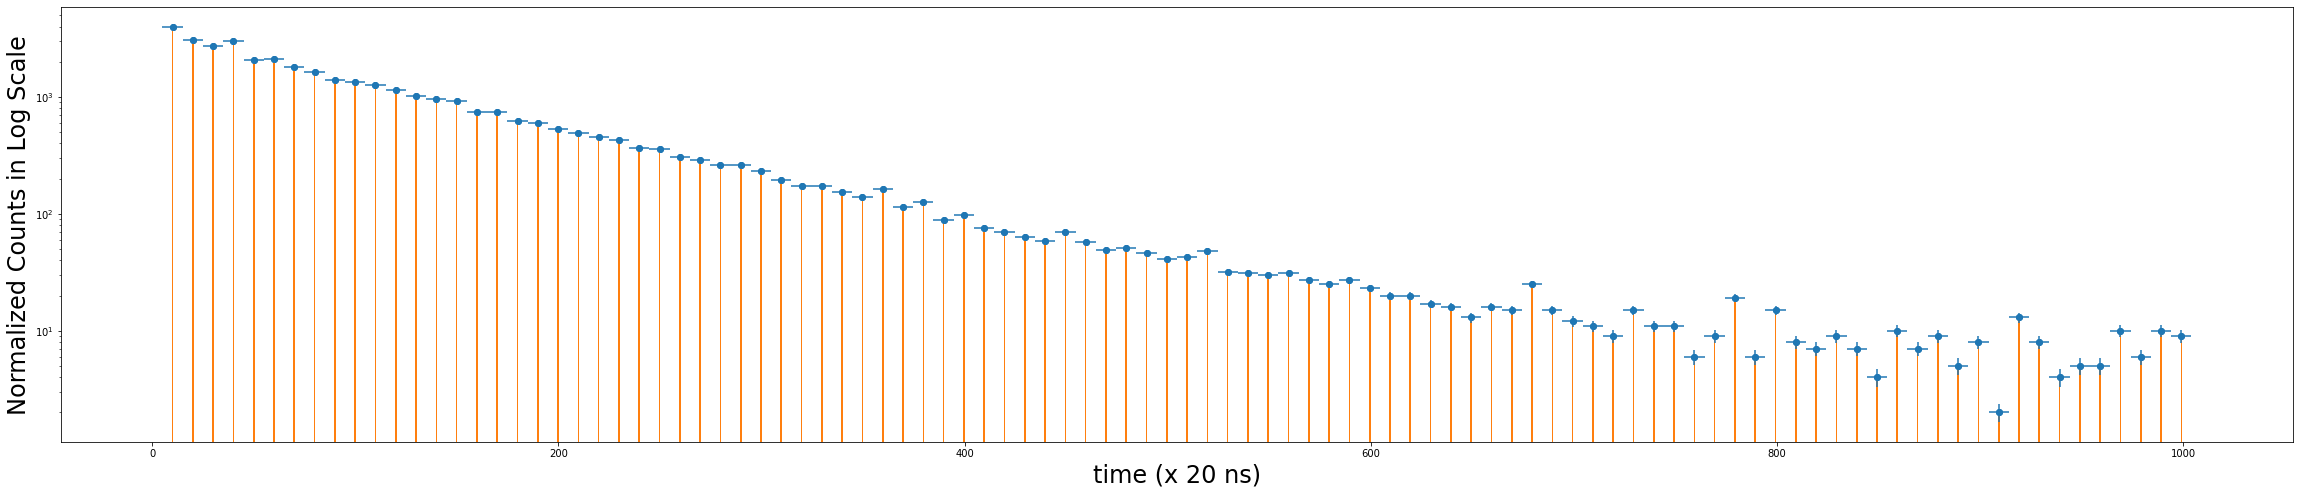

In [ ]:
#@title U-D/U+D, U-D, U+D with BG Data and Target in 
DecayAsymmetryFinderWithoutRemovingBGDataAndTargetOut(UpTdcMagOn,DownTdcMagOn,100)
UminusDWithoutRemovingBGAndTargetOut, UminusDWithoutRemovingBGAndTargetOutxspace = UminusDFinderWithoutRemovingBGAndTargetOut(UpTdcMagOn,DownTdcMagOn,100)
UplusDFinderWithoutRemovingBGAndTargetOut(UpTdcMagOn,DownTdcMagOn,100)


UpTdcBG
Muon lifetime = 2.191181725527376 +/- 0.05554417030163927 μs
χ² = 55.020879326020996
Degrees of Freedom = 68
P-Value = 0.8717491133673694

DownTdcBG
Muon lifetime = 2.1962791487691016 +/- 0.06260216729249635 μs
χ² = 70.48705344421587
Degrees of Freedom = 83
P-Value = 0.8345604912307705

UpTdcTarOut
Muon lifetime = 2.1655734081331386 +/- 0.05785439411085136 μs
χ² = 59.91943477611481
Degrees of Freedom = 68
P-Value = 0.7468571117365326

DownTdcTarOut
Muon lifetime = 2.106502574092407 +/- 0.10515459079064815 μs
χ² = 61.21854955632054
Degrees of Freedom = 68
P-Value = 0.7068993969703137



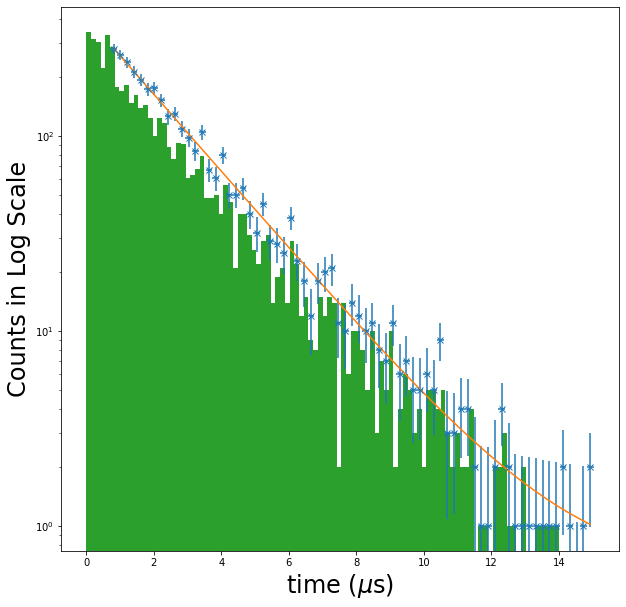

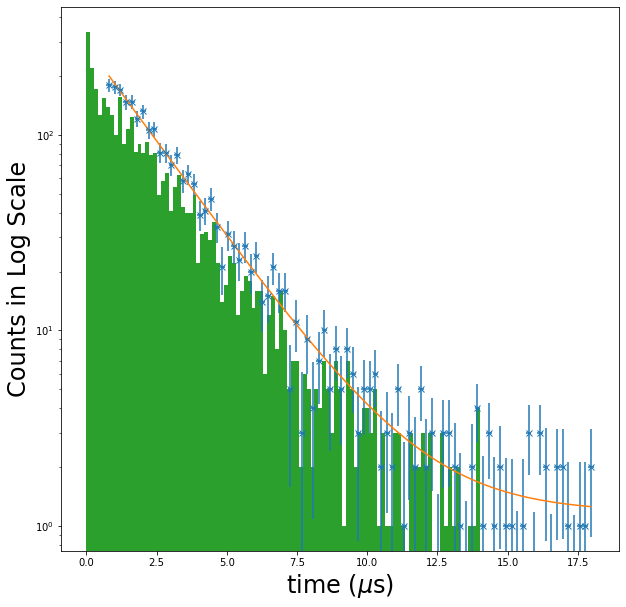

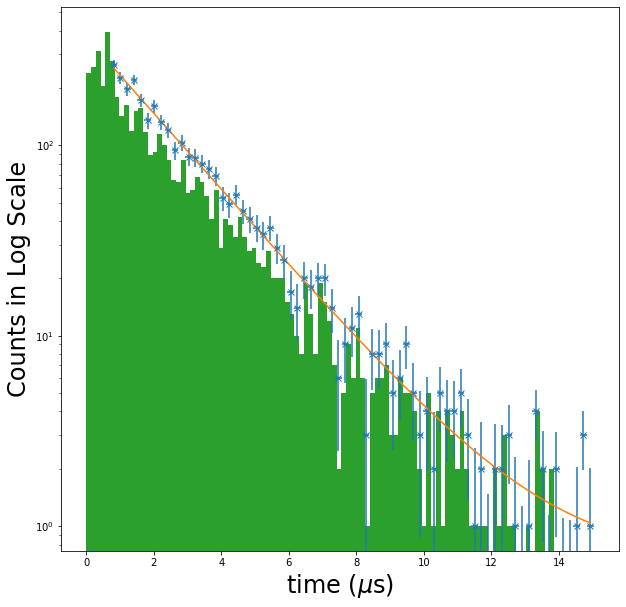

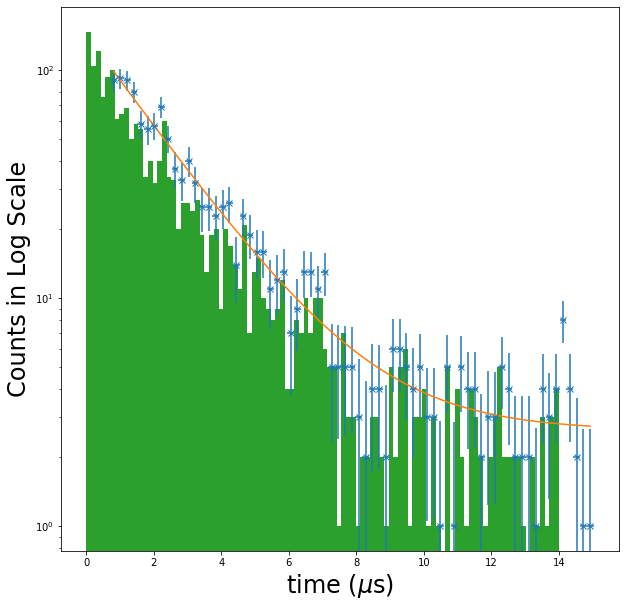

In [ ]:
#@title Exponential Fits for Lifetime and Target Out Data

print('UpTdcBG')
odr_and_chi_square_fit_exponential(450, 0.009, 2, 4, 75, UpTdcBG, exponential_only_fun, exponential_fit_fun2)
print('')
print('DownTdcBG')
odr_and_chi_square_fit_exponential(450, 0.009, 2, 4, 90, DownTdcBG, exponential_only_fun, exponential_fit_fun2)
print('')
print('UpTdcTarOut')
odr_and_chi_square_fit_exponential(450, 0.009, 2, 4, 75, UpTdcTarOut, exponential_only_fun, exponential_fit_fun2)
print('')
print('DownTdcTarOut')
odr_and_chi_square_fit_exponential(450, 0.009, 2, 4, 75, DownTdcTarOut, exponential_only_fun, exponential_fit_fun2)
print('')

In [ ]:
print(len(UpTdcMagOn)+len(DownTdcMagOn)-len(UpTdcBG)-len(DownTdcBG)-len(UpTdcTarOut)-len(DownTdcTarOut))
print(len(UpTdcMagOn)+len(DownTdcMagOn)-len(UpTdcBG)-len(DownTdcBG))
print(len(UpTdcMagOn)+len(DownTdcMagOn))

46264
59208
76064


[1.45859352e+01 2.19809762e+02 6.21641356e-02 3.46614805e-03
 2.53174926e-01]
[1.44968685e+01 4.18618587e+01 2.26753258e-04 4.03539569e-04
 1.29867987e-01]
[ 2.51226210e+00  9.81876210e+01  6.29502135e-02 -3.28976673e-03
 -4.02866725e-01]
[8.50910070e+00 3.36033024e+01 3.24239876e-04 5.96819443e-04
 1.84366804e-01]
[ 6.80734389e+02  6.94651745e+02  6.65362555e-02 -1.11532371e-02
 -1.86687098e+00]
[9.26250649e+01 1.07553437e+02 8.37000914e-04 4.18140410e-04
 2.51749048e-01]


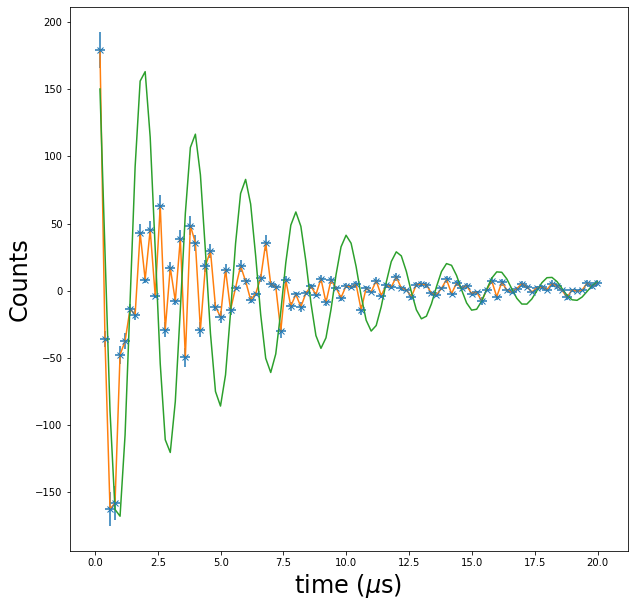

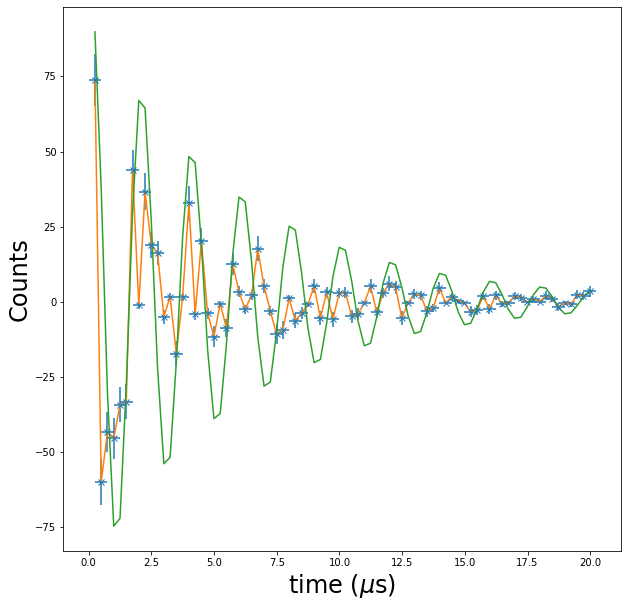

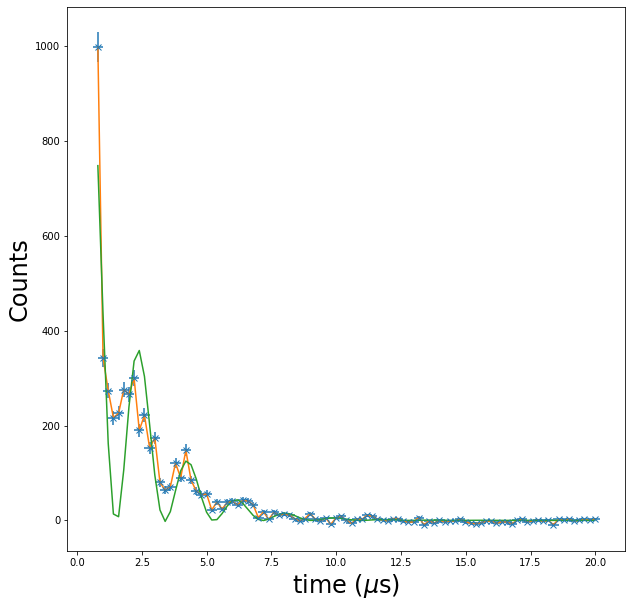

In [ ]:
#@title Sinusoidal Fits for U-D
odr_and_chi_square_fit_sinusoidal(5,100,0.065,0.02,0,0,0,UminusD*(len(UpTdcMagOn)+len(DownTdcMagOn)-len(UpTdcBG)-len(DownTdcBG)-len(UpTdcTarOut)-len(DownTdcTarOut)), UminusDxspace, sinusoidal_fit_fun)
odr_and_chi_square_fit_sinusoidal(10,150,0.05,0.3,0,0,0,UminusDWithoutRemovingTargetOut*(len(UpTdcMagOn)+len(DownTdcMagOn)-len(UpTdcBG)-len(DownTdcBG)), UminusDWithoutRemovingTargetOutxspace, sinusoidal_fit_fun)
odr_and_chi_square_fit_sinusoidal(100,150,0.06,0.02,0.04,3,0,UminusDWithoutRemovingBGAndTargetOut, UminusDWithoutRemovingBGAndTargetOutxspace, sinusoidal_fit_fun)

Miscellaneous Code 

In [ ]:
# CountsUpData, BinsUpData = np.histogram(UpTdcMagOn, bins = 150, range=(0.0,999.0))
# CountsUpBG, BinsUpBG = np.histogram(UpTdcBG, bins = 150, range=(0.0,999.0))
# CountsDownData, BinsDownData = np.histogram(DownTdcMagOn, bins = 150, range=(0.0,999.0))
# CountsDownBG, BinsDownBG = np.histogram(DownTdcBG, bins = 150, range=(0.0,999.0))

# UminusD = (CountsUpData)-(CountsDownData)
# UplusD = (CountsUpData)+(CountsDownData)
# RatioUD = (UminusD/UplusD)

# xspace = BinsUpData[1:]
# xspace = np.transpose(xspace)
#   # print(xspace)
#   # print(RatioUD)
#   #plt.plot(xspace, RatioUD,'o')
# plt.figure(figsize=(40,8))
# plt.scatter(xspace,RatioUD)
# plt.bar(xspace, RatioUD)
# plt.yscale('log')

In [ ]:
# def BackgroundDataRemoverFail(Data,BGData,binsnumber):
#   factor = len(Data)/len(BGData)
#   MagOnHist, MagOnBins = np.histogram(Data, bins = binsnumber)
#   BGHistIntermediate, BGIntermediateBins = np.histogram(BGData, bins = binsnumber)
#   BGHist = np.histogram(BGData, bins=binsnumber, weights = int(factor*BGHistIntermediate))
#   min = np.minimum(MagOnHist,BGHist)
#   max = np.maximum(MagOnHist,BGHist)

#   hist1, _ = np.histogram(Data, range=(min,max),bins=binsnumber)
#   hist2, _ = np.histogram(BGData,range=(min,max),bins=binsnumber)
#   histdiff, binshistdiff = hist1 - hist2

#   plt.hist(binshistdiff[:-1], binshistdiff)
#   return



In [ ]:
# UminusD = UpTdcMagOn - DownTdcMagOn
# #plt.hist(UminusD1, bins = 'auto')
# UplusD = UpTdcMagOn + DownTdcMagOn
# RatioUD2 = UminusD2/UplusD2

# plt.hist(RatioUD2, 100, (-10,10))
# plt.yscale('log')

In [ ]:
# UminusD1 = UpTdcMagOn1 - DownTdcMagOn1
# #plt.hist(UminusD1, bins = 'auto')
# UplusD1 = UpTdcMagOn1 + DownTdcMagOn1
# RatioUD1 = np.abs(UminusD1/UplusD1)

# plt.hist(RatioUD1, 100, (-10,10))
# plt.yscale('log')


4947
[4.05713948e+02 9.11412548e-03 5.49690891e-01]
[1.46966770e+01 2.04213275e-04 1.56510469e-01]
Muon lifetime = 2.1943959466431986 +/- 0.04809063014509274 μs
χ² = 95.42328263119835
Degrees of Freedom = 93
P-Value = 0.4110029277101519


Text(0, 0.5, 'Counts in Log Scale')

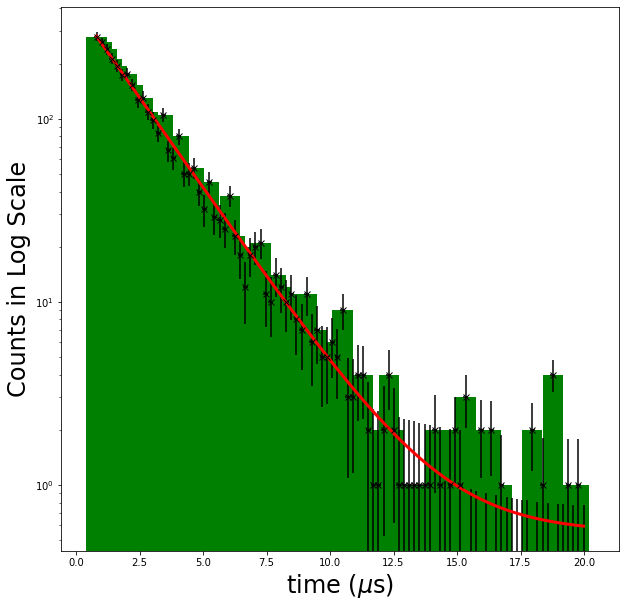

In [ ]:
#Figure 20
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(UpTdcBG)
expmodel = Model(exponential_fit_fun2)
mean_data = np.mean(datahist)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = (np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons)))

while abs(delta_mean) > 5*10**(-7):
  dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
  out = odr.run()
  mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  delta_mean = mean_data_new - mean_data
  mean_data = mean_data_new
  err_y = (np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))) 
  #out.pprint()
print(np.sum(datahist))
print(out.beta)
print(np.diag(out.cov_beta)**(1/2))
BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
#errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
n = (end-start)-len(GuessParameters)
pval = 1-chi2.cdf(chi_sqr,n)
print('\u03C7\u00b2 = ' +str(chi_sqr))
print('Degrees of Freedom = ' +str(n))
print('P-Value = ' + str(pval))

#to prevent y error bar from going to less than 0
err_y_upper = err_y.copy()
err_y_lower = err_y.copy()
err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
err_y = np.stack([err_y_lower,err_y_upper])

plt.figure(figsize=[10,10])
plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x',color='k')
plt.yscale('log')
plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]),color='r',linewidth=3)
plt.bar(TimeMuons[start:end]*0.02,datahist[start:end],color='g')
plt.xlabel('time ($\mu$s)')
plt.ylabel('Counts in Log Scale')

3467
[2.87454308e+02 9.11857729e-03 1.19958380e+00]
[1.23696384e+01 2.58501854e-04 1.99020604e-01]
Muon lifetime = 2.193324613073801 +/- 0.06046429484085447 μs
χ² = 78.28828678849985
Degrees of Freedom = 93
P-Value = 0.8625652818484093


Text(0, 0.5, 'Counts in Log Scale')

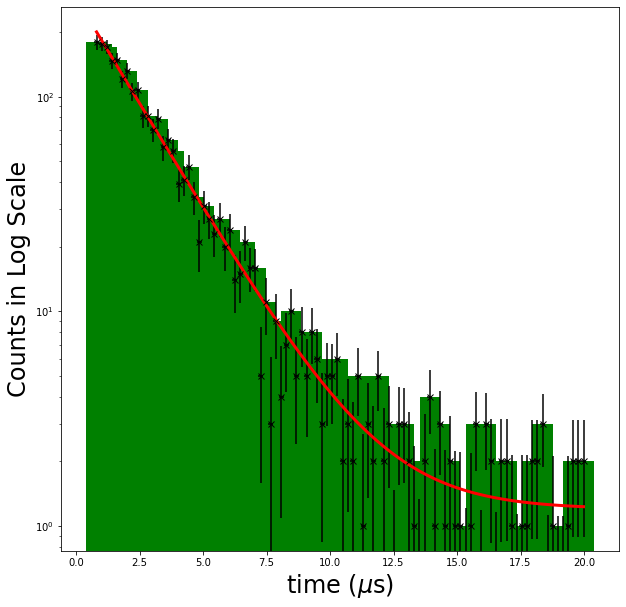

In [ ]:
#Figure 21
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(DownTdcBG)
expmodel = Model(exponential_fit_fun2)
mean_data = np.mean(datahist)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = (np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons)))

while abs(delta_mean) > 5*10**(-7):
  dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
  out = odr.run()
  mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  delta_mean = mean_data_new - mean_data
  mean_data = mean_data_new
  err_y = (np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))) 
  #out.pprint()
print(np.sum(datahist))
print(out.beta)
print(np.diag(out.cov_beta)**(1/2))
BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
#errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
n = (end-start)-len(GuessParameters)
pval = 1-chi2.cdf(chi_sqr,n)
print('\u03C7\u00b2 = ' +str(chi_sqr))
print('Degrees of Freedom = ' +str(n))
print('P-Value = ' + str(pval))

#to prevent y error bar from going to less than 0
err_y_upper = err_y.copy()
err_y_lower = err_y.copy()
err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
err_y = np.stack([err_y_lower,err_y_upper])

plt.figure(figsize=[10,10])
plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x',color='k')
plt.yscale('log')
plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]),color='r',linewidth=3)
plt.bar(TimeMuons[start:end]*0.02,datahist[start:end],color='g')
plt.xlabel('time ($\mu$s)')
plt.ylabel('Counts in Log Scale')

4534
[3.75885784e+02 9.42615911e-03 1.10700466e+00]
[1.48123183e+01 2.33859319e-04 1.92083468e-01]
Muon lifetime = 2.12175497660668 +/- 0.05136555147777777 μs
χ² = 81.7749733590709
Degrees of Freedom = 93
P-Value = 0.790829490273553


Text(0, 0.5, 'Counts in Log Scale')

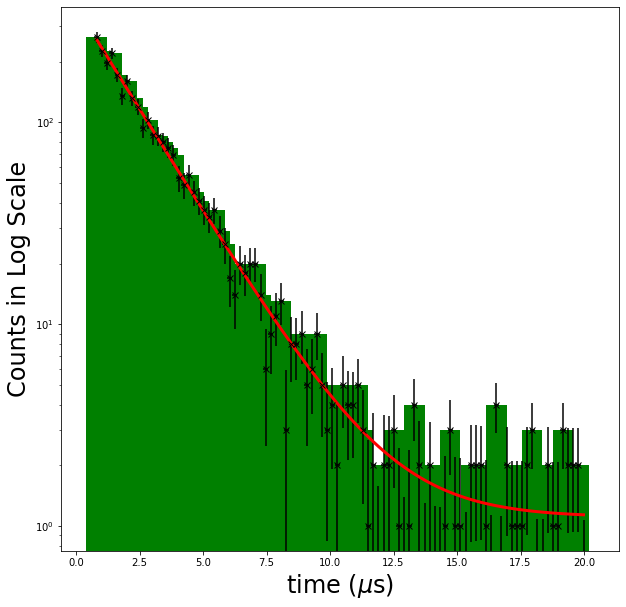

In [ ]:
#Figure 22
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(UpTdcTarOut)
expmodel = Model(exponential_fit_fun2)
mean_data = np.mean(datahist)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = (np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons)))

while abs(delta_mean) > 5*10**(-7):
  dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
  out = odr.run()
  mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  delta_mean = mean_data_new - mean_data
  mean_data = mean_data_new
  err_y = (np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))) 
  #out.pprint()
print(np.sum(datahist))
print(out.beta)
print(np.diag(out.cov_beta)**(1/2))
BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
#errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
n = (end-start)-len(GuessParameters)
pval = 1-chi2.cdf(chi_sqr,n)
print('\u03C7\u00b2 = ' +str(chi_sqr))
print('Degrees of Freedom = ' +str(n))
print('P-Value = ' + str(pval))

#to prevent y error bar from going to less than 0
err_y_upper = err_y.copy()
err_y_lower = err_y.copy()
err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
err_y = np.stack([err_y_lower,err_y_upper])

plt.figure(figsize=[10,10])
plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x',color='k')
plt.yscale('log')
plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]),color='r',linewidth=3)
plt.bar(TimeMuons[start:end]*0.02,datahist[start:end],color='g')
plt.xlabel('time ($\mu$s)')
plt.ylabel('Counts in Log Scale')

1915
[1.41038347e+02 9.50818126e-03 2.65178986e+00]
[9.09930347e+00 4.49746694e-04 2.52307011e-01]
Muon lifetime = 2.1034516963705303 +/- 0.0950017364050808 μs
χ² = 99.76194417532653
Degrees of Freedom = 93
P-Value = 0.29705250226315383


Text(0, 0.5, 'Counts in Log Scale')

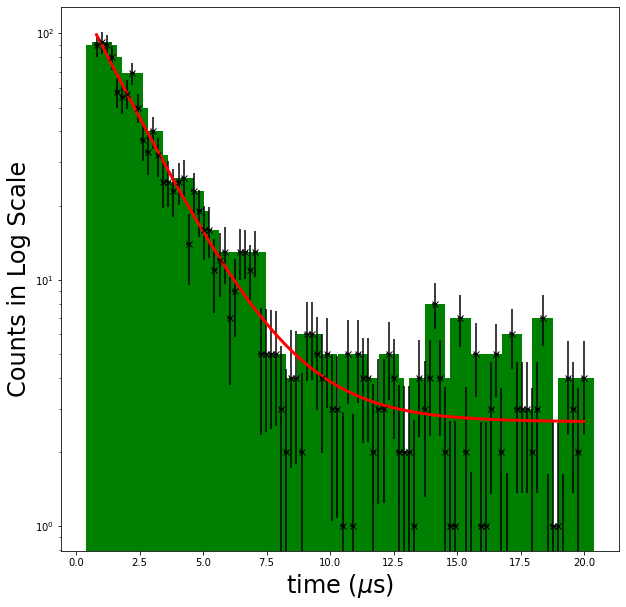

In [ ]:
#Figure 23
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(DownTdcTarOut)
expmodel = Model(exponential_fit_fun2)
mean_data = np.mean(datahist)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = (np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons)))

while abs(delta_mean) > 5*10**(-7):
  dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
  out = odr.run()
  mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  delta_mean = mean_data_new - mean_data
  mean_data = mean_data_new
  err_y = (np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))) 
  #out.pprint()
print(np.sum(datahist))
print(out.beta)
print(np.diag(out.cov_beta)**(1/2))
BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
#errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
n = (end-start)-len(GuessParameters)
pval = 1-chi2.cdf(chi_sqr,n)
print('\u03C7\u00b2 = ' +str(chi_sqr))
print('Degrees of Freedom = ' +str(n))
print('P-Value = ' + str(pval))

#to prevent y error bar from going to less than 0
err_y_upper = err_y.copy()
err_y_lower = err_y.copy()
err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
err_y = np.stack([err_y_lower,err_y_upper])

plt.figure(figsize=[10,10])
plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x',color='k')
plt.yscale('log')
plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]),color='r',linewidth=3)
plt.bar(TimeMuons[start:end]*0.02,datahist[start:end],color='g')
plt.xlabel('time ($\mu$s)')
plt.ylabel('Counts in Log Scale')

8414
[6.93208480e+02 9.12060908e-03 1.76351449e+00]
[2.11347362e+01 1.69486550e-04 2.57101517e-01]
Muon lifetime = 2.1928360065443346 +/- 0.040005638749254224 μs
χ² = 73.88452178075032
Degrees of Freedom = 93
P-Value = 0.9280350132162613


Text(0, 0.5, 'Counts in Log Scale')

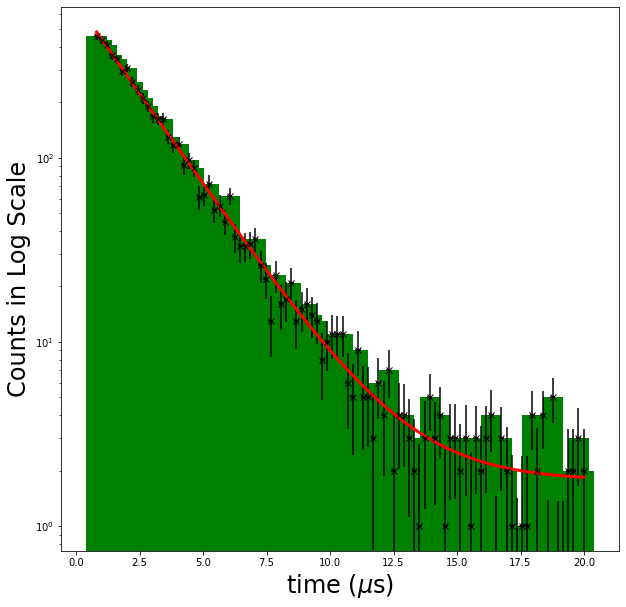

In [ ]:
#Up+Dn BGN
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(np.array([UpTdcBG,DownTdcBG]))
expmodel = Model(exponential_fit_fun2)
mean_data = np.mean(datahist)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = (np.sqrt(exponential_fit_fun2(GuessParameters,TimeMuons)))

while abs(delta_mean) > 5*10**(-7):
  dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
  odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
  out = odr.run()
  mean_data_new = np.mean(exponential_only_fun(out.beta,TimeMuons)) #mean should be of exp without background.
  delta_mean = mean_data_new - mean_data
  mean_data = mean_data_new
  err_y = (np.sqrt(exponential_fit_fun2(out.beta,TimeMuons))) 
  #out.pprint()
print(np.sum(datahist))
print(out.beta)
print(np.diag(out.cov_beta)**(1/2))
BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
#errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error) +' \u03BCs') 

chi_sqr = np.sum((datahist[start:end]-exponential_fit_fun2(BestParameters,TimeMuons[start:end]))**2/exponential_fit_fun2(BestParameters,TimeMuons[start:end]))
n = (end-start)-len(GuessParameters)
pval = 1-chi2.cdf(chi_sqr,n)
print('\u03C7\u00b2 = ' +str(chi_sqr))
print('Degrees of Freedom = ' +str(n))
print('P-Value = ' + str(pval))

#to prevent y error bar from going to less than 0
err_y_upper = err_y.copy()
err_y_lower = err_y.copy()
err_y_lower[(datahist-err_y_lower)<0] = datahist[(datahist-err_y_lower)<0]
err_y = np.stack([err_y_lower,err_y_upper])

plt.figure(figsize=[10,10])
plt.errorbar(TimeMuons[start:end]*0.02,datahist[start:end], xerr=err_x[start:end]*0.02, yerr=err_y[:,start:end], linestyle='None', marker='x',color='k')
plt.yscale('log')
plt.plot(TimeMuons[start:end]*0.02,exponential_fit_fun2(BestParameters,TimeMuons[start:end]),color='r',linewidth=3)
plt.bar(TimeMuons[start:end]*0.02,datahist[start:end],color='g')
plt.xlabel('time ($\mu$s)')
plt.ylabel('Counts in Log Scale')

Best A: 414.8290576210055 +/- 12.464720639675647
Best B: 0.009347535331964708 +/- 0.0002873203436949124
Best C: 1.0790458518205148 +/- 1.2250738611527863
Muon lifetime = 2.1396014339318157 +/- 0.06380490170916087


<ipython-input-169-81c854796abd>:277: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-B*time) + C


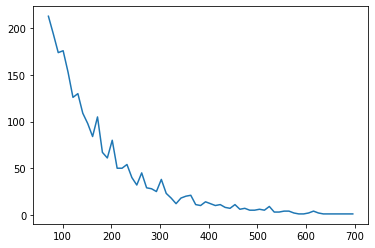

In [ ]:
#@title Muon Lifetime Fit: Ae^(-Bt)+C (Using Least Squares)

GuessA= 0.10
GuessB= 0.02
GuessC = 1

GuessParameters = [GuessA, GuessB, GuessC]

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(UpTdcBG)
BestParameters,covar = curve_fit(exponential_fit_fun,TimeMuons[7:70],datahist[7:70],p0=GuessParameters)
#res_lsq = least_squares(get_exponential_residuals, GuessParameters, args = (UpTdcBG,TimeMuons))
#print(get_exponential_residuals(GuessParameters,UpTdcBG,TimeMuons))
errors = np.diag(covar)**(1/2)
#BestParameters = res_lsq['x']
#FittedFunction = exponential_fit_fun(BestParameters,TimeMuons)
print('Best A: ' + str(BestParameters[0]) +str(' +/- ') + str(errors[0]))
print('Best B: ' + str(BestParameters[1]) +str(' +/- ') + str(errors[1]))
print('Best C: ' + str(BestParameters[2]) +str(' +/- ') + str(errors[2]))
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error)) 

plt.plot(TimeMuons[7:70],datahist[7:70])

Muon lifetime = 2.1331990589130374 +/- 0.07440569122534901


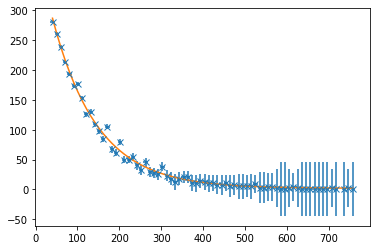

In [ ]:
#@title truncated data
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 4 #min 0 
end = 75 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(UpTdcBG)
expmodel = Model(exponential_fit_fun2)
zeroidx = np.where(datahist==0)
TimeMuons = np.delete(TimeMuons,zeroidx)
datahist = np.delete(datahist,zeroidx)
mean_data = np.mean(datahist[start:end])


err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = mean_data/(np.sqrt(datahist))
dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
out = odr.run()
#out.pprint()

BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error)) 

plt.figure()#figsize=[20,20])
plt.errorbar(TimeMuons[start:end],datahist[start:end], xerr=err_x[start:end], yerr=err_y[start:end], linestyle='None', marker='x')
plt.plot(TimeMuons[start:end],exponential_fit_fun2(BestParameters,TimeMuons[start:end]))

In [ ]:
data = TestData
xspace = testxspace
GuessParameters = [400,150,0.06,0.01,0.1]
xspace = np.delete(xspace,np.where(data==0))
data = np.delete(data,np.where(data==0))
TimeMuons = xspace
expmodel = Model(sinusoidal_fit_fun)
mean_data = np.mean(data)
delta_mean = mean_data-0
err_x = np.zeros(np.shape(data))+5 #binwidth/2
err_y = mean_data/(np.sqrt(abs(data)))
dataobj = RealData(TimeMuons,data,sx=err_x,sy=err_y)

NameError: ignored

In [ ]:
plt.plot(sinusoidal_fit_fun(GuessParameters,TimeMuons))
plt.plot(data,'-')

In [ ]:
dataobj = RealData(TimeMuons[6:],data[6:],sx=err_x[6:],sy=err_y[6:])
odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-5))
out = odr.run()
plt.figure()
plt.plot(sinusoidal_fit_fun(out.beta,TimeMuons[:]))
plt.plot(data[:],'-')

In [ ]:
out.beta

array([ 3.62194468e+02,  2.08925953e+02,  6.04223793e-02,  9.82879388e-03,
       -1.62600627e-01])

Muon lifetime = 1.8548980292345625 +/- 0.055645392189244136


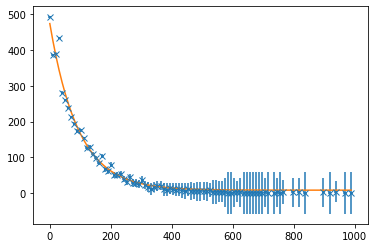

In [ ]:
#@title Muon Lifetime Fit Using BG Data: Ae^(-Bt)+C (Using ODR) and Chi-square
GuessA= 450
GuessB= 0.009
GuessC = 2
GuessParameters = [GuessA, GuessB, GuessC]

start = 0 #min 0 
end = 100 #max 100

TimeMuons = np.linspace(0.0,999.0,100)
datahist,binhist = histdata(UpTdcBG)
expmodel = Model(exponential_fit_fun2)
zeroidx = np.where(datahist==0)
TimeMuons = np.delete(TimeMuons,zeroidx)
datahist = np.delete(datahist,zeroidx)
mean_data = np.mean(datahist[start:end])


err_x = np.zeros(np.shape(datahist))+5 #binwidth/2
err_y = mean_data/(np.sqrt(datahist))
dataobj = RealData(TimeMuons[start:end],datahist[start:end],sx=err_x[start:end],sy=err_y[start:end])
odr = ODR(dataobj,expmodel,beta0=GuessParameters,maxit=10000,sstol=10**(-10))
out = odr.run()
#out.pprint()

BestParameters = out.beta
errors = np.diag(out.cov_beta)**(1/2) #which error to use?
errors = out.sd_beta
lifetime = 0.02/BestParameters[1]
lifetime_error = 0.02/BestParameters[1] - 0.02/(BestParameters[1]+errors[1])
print('Muon lifetime = ' + str(lifetime) +' +/- ' +str(lifetime_error)) 

plt.figure()#figsize=[20,20])
plt.errorbar(TimeMuons[start:end],datahist[start:end], xerr=err_x[start:end], yerr=err_y[start:end], linestyle='None', marker='x')
plt.plot(TimeMuons[start:end],exponential_fit_fun2(BestParameters,TimeMuons[start:end]))

In [ ]:
print(out.beta)

[4.19249379e+02 9.42499649e-03 9.02675559e-01]
